# Using Linear Regression to Predict the Salary of NBA Players

In [1]:
import pandas as pd
import numpy as np

## Let's load in 2017-18 NBA Salary data

In [2]:
salaries = pd.read_csv("NBA_season1718_salary.csv", index_col="Index")
salaries

,Player,Tm,season17_18
Index,,,
1,Stephen Curry,GSW,34682550.0
2,LeBron James,CLE,33285709.0
3,Paul Millsap,DEN,31269231.0
4,Gordon Hayward,BOS,29727900.0
5,Blake Griffin,DET,29512900.0
...,...,...,...
569,Quinn Cook,NOP,25000.0
570,Chris Johnson,HOU,25000.0
571,Beno Udrih,DET,25000.0


## Now let's get player stats from that season

In [3]:
player_stats = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2018_per_game.html")[0].drop("Rk", axis=1)
player_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,.356,...,.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,.629,...,.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,.512,...,.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,.401,...,.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Tyler Zeller,C,28,BRK,42,33,16.7,3.0,5.5,.546,...,.667,1.5,3.1,4.6,0.7,0.2,0.5,0.8,1.9,7.1
686,Tyler Zeller,C,28,MIL,24,1,16.9,2.6,4.4,.590,...,.895,2.0,2.7,4.6,0.8,0.3,0.6,0.5,2.0,5.9
687,Paul Zipser,SF,23,CHI,54,12,15.3,1.5,4.3,.346,...,.760,0.2,2.2,2.4,0.9,0.4,0.3,0.8,1.6,4.0
688,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,.731,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7


## Time for some quick data cleaning! (You can ignore this code.)

In [4]:
player_stats = player_stats.drop_duplicates(keep=False) # Drop extraneous rows from data source
player_stats = player_stats.drop_duplicates(subset=["Player"], keep="first") # Keep only stats of traded players in TOT
player_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,.356,...,.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,.629,...,.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,.512,...,.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,.401,...,.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,Cody Zeller,C,25,CHO,33,0,19.0,2.6,4.7,.545,...,.718,2.0,3.3,5.4,0.9,0.4,0.6,1.0,2.5,7.1
684,Tyler Zeller,C,28,TOT,66,34,16.8,2.8,5.1,.560,...,.722,1.7,3.0,4.6,0.7,0.2,0.5,0.7,1.9,6.7
687,Paul Zipser,SF,23,CHI,54,12,15.3,1.5,4.3,.346,...,.760,0.2,2.2,2.4,0.9,0.4,0.3,0.8,1.6,4.0
688,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,.731,...,.724,0.8,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7


## We can now merge our two data frames

In [5]:
df = pd.merge(salaries, player_stats).drop(["Player", "Tm"], axis=1)
df = pd.get_dummies(df, columns=["Pos"], drop_first=True) # Dummy variables for position
df

,season17_18,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,TOV,PF,PTS,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,34682550.0,29,51,51,32.0,8.4,16.9,.495,4.2,9.8,...,6.1,1.6,0.2,3.0,2.2,26.4,0,1,0,0
1,33285709.0,33,82,82,36.9,10.5,19.3,.542,1.8,5.0,...,9.1,1.4,0.9,4.2,1.7,27.5,1,0,0,0
2,31269231.0,32,38,37,30.1,5.3,11.4,.464,1.0,3.0,...,2.8,1.0,1.2,1.9,2.6,14.6,1,0,0,0
3,29727900.0,27,1,1,5.0,1.0,2.0,.500,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0,0,1,0
4,28703704.0,31,78,78,32.2,5.2,12.1,.427,3.1,7.6,...,6.9,1.1,0.2,2.3,2.5,16.2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,46080.0,23,16,2,18.1,2.2,6.7,.327,0.8,3.3,...,1.1,0.2,0.2,0.6,1.6,6.0,0,0,0,1
378,46080.0,23,5,0,23.6,2.4,8.4,.286,0.2,2.8,...,3.6,1.2,0.6,2.2,3.6,5.8,0,0,0,1
379,46080.0,27,1,0,1.0,0.0,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
380,46080.0,24,3,0,9.0,2.3,4.0,.583,0.0,0.0,...,0.0,0.0,0.0,0.3,0.7,5.7,1,0,0,0


#### (Note that merging the two data frames caused us to lose some of the rows.)

## Before we dive straight into the regression, we need to do some preliminary setting up. Let's start by generating a correlation matrix of all our features and seeing which ones are most correlated with `season17_18` salary.

In [6]:
df = df.apply(pd.to_numeric)
correlations = df.corr()
correlations.iloc[0, 0:].sort_values(ascending=False)

season17_18    1.000000
PTS            0.615302
FG             0.603052
FTA            0.591261
GS             0.590852
FT             0.590461
FGA            0.578058
MP             0.563738
2P             0.552611
2PA            0.539726
DRB            0.520290
TOV            0.519874
TRB            0.494356
AST            0.457792
STL            0.415601
3PA            0.385206
3P             0.380508
BLK            0.366439
Age            0.356272
PF             0.348796
ORB            0.327787
G              0.251740
FT%            0.150198
2P%            0.137418
FG%            0.126823
eFG%           0.097434
3P%            0.063132
Pos_SF         0.024266
Pos_PG        -0.021271
Pos_PF        -0.026390
Pos_SG        -0.057367
Name: season17_18, dtype: float64

In [7]:
df_features1 = df[["season17_18", "PTS", "FG", "FTA", "GS", "FT", "FGA", "MP", "2P", "2PA", "DRB", "TOV", "TRB", "AST", "STL", "3PA", "3P", "BLK", "Age", "Pos_SF", "Pos_PG", "Pos_PF", "Pos_SG"]]
df_features1

,season17_18,PTS,FG,FTA,GS,FT,FGA,MP,2P,2PA,...,AST,STL,3PA,3P,BLK,Age,Pos_SF,Pos_PG,Pos_PF,Pos_SG
0,34682550.0,26.4,8.4,5.9,51,5.5,16.9,32.0,4.2,7.1,...,6.1,1.6,9.8,4.2,0.2,29,0,1,0,0
1,33285709.0,27.5,10.5,6.5,82,4.7,19.3,36.9,8.6,14.3,...,9.1,1.4,5.0,1.8,0.9,33,0,0,1,0
2,31269231.0,14.6,5.3,4.2,37,2.9,11.4,30.1,4.3,8.5,...,2.8,1.0,3.0,1.0,1.2,32,0,0,1,0
3,29727900.0,2.0,1.0,0.0,1,0.0,2.0,5.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,27,1,0,0,0
4,28703704.0,16.2,5.2,3.3,78,2.9,12.1,32.2,2.1,4.5,...,6.9,1.1,7.6,3.1,0.2,31,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,46080.0,6.0,2.2,0.9,2,0.8,6.7,18.1,1.4,3.4,...,1.1,0.2,3.3,0.8,0.2,23,0,0,0,1
378,46080.0,5.8,2.4,1.8,0,0.8,8.4,23.6,2.2,5.6,...,3.6,1.2,2.8,0.2,0.6,23,0,0,0,1
379,46080.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27,0,0,0,1
380,46080.0,5.7,2.3,1.7,0,1.0,4.0,9.0,2.3,4.0,...,0.0,0.0,0.0,0.0,0.0,24,0,0,1,0


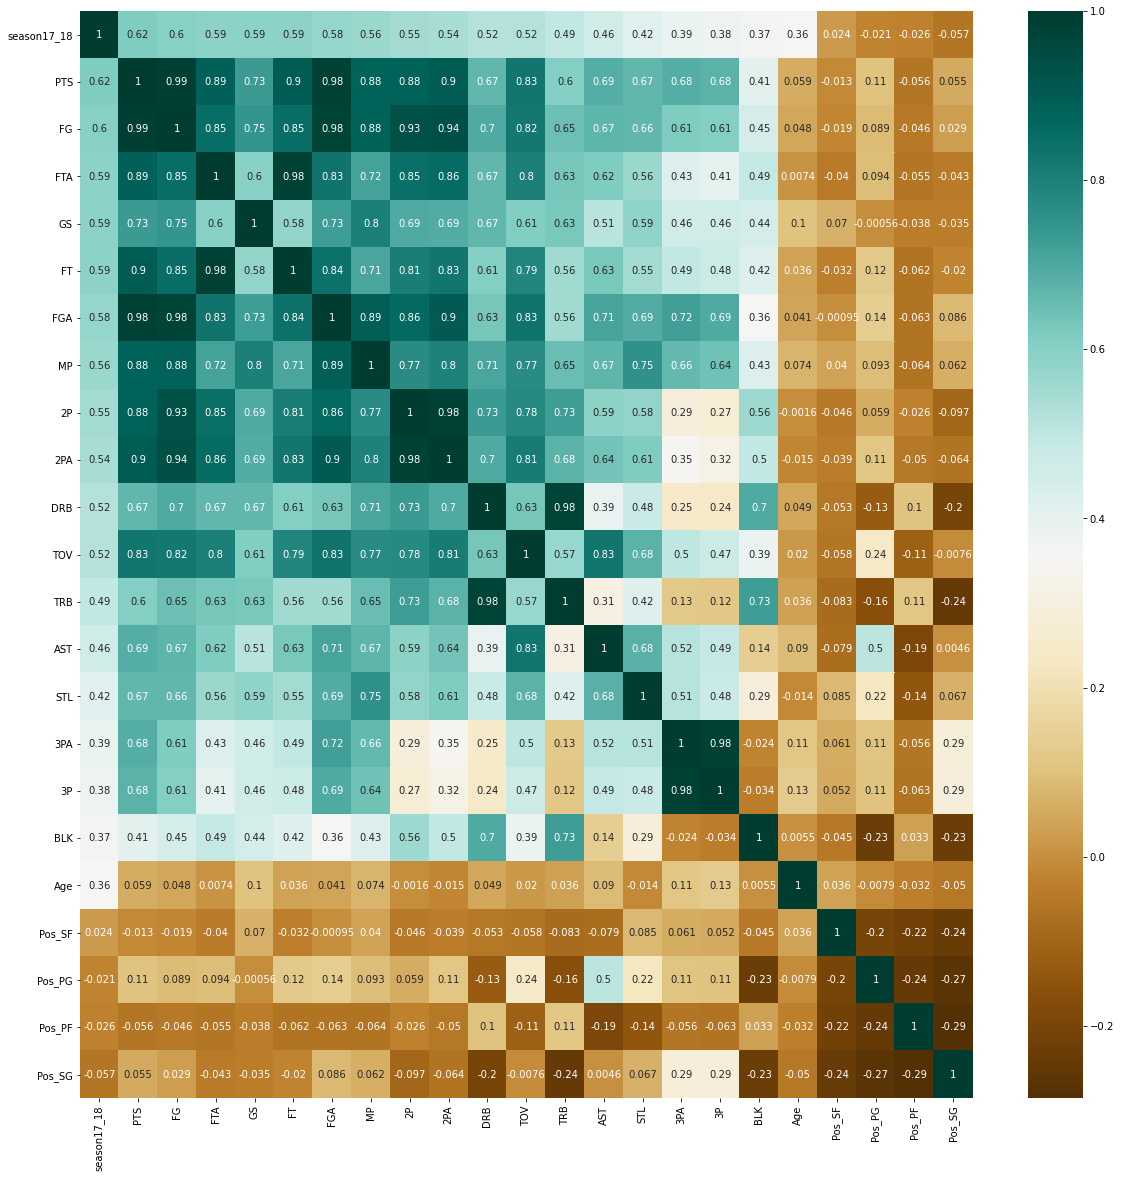

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations_features1 = df_features1.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_features1.corr(), annot = True, cmap='BrBG');

## We have some multicollinearity problems! `PTS` has really high correlations with our other features. We only need to keep one! We'll do this for other highly correlated features as well.

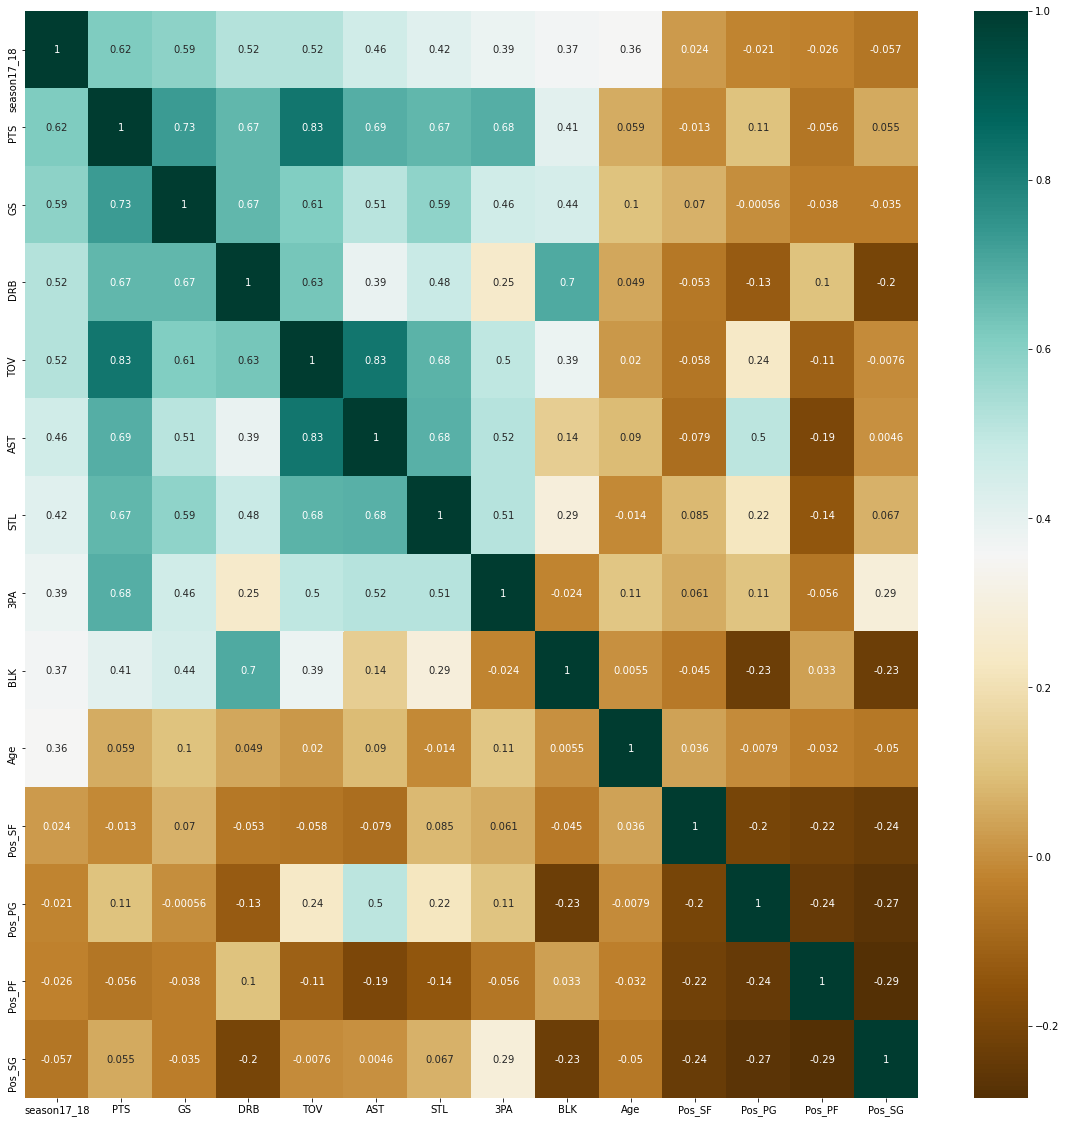

In [9]:
df_features2 = df[["season17_18", "PTS", "GS", "DRB", "TOV", "AST", "STL", "3PA", "BLK", "Age", "Pos_SF", "Pos_PG", "Pos_PF", "Pos_SG"]]
correlations_features2 = df_features2.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_features2.corr(), annot = True, cmap='BrBG');

## Now let's check our other assumptions before we go forth with regression. We can do this by (1) plotting salaries against all our features and looking for linear relationships, and (2) QQ Plots to check for normality

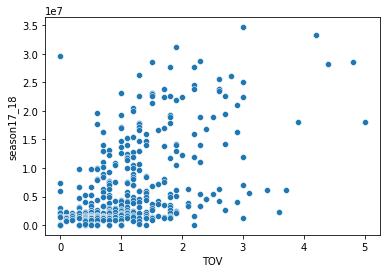

In [12]:
sns.scatterplot(data=df_features2, x="TOV", y="season17_18");

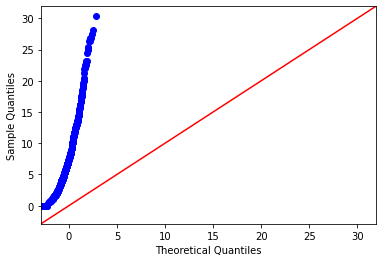

In [16]:
# QQ Plots - create dataset with 100 values that follow a normal distribution
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df_features2["PTS"], line='45')
plt.show()

#### Distribution is skewed right based on the QQ plot, so consider doing a log/sqrt transformation!

## Our features didn't pass the vibe check, and a good data scientist would use data transformations to fix that. However, I am lazy, so that will be left as an exercise for the reader. It's regression time!

In [17]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [18]:
df_train, df_test = train_test_split(df_features2, 
                                     train_size = 0.7, # 70% of the data will be used to train the model
                                     test_size = 0.3, # 30% of the data will be held out for the test set
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

267
115


In [19]:
# split into X and y for both train and test sets

X_train = df_train.drop("season17_18", axis = 1)
#X_train = X_train.values.reshape(-1, 1)
y_train = df_train['season17_18']

X_test = df_test.drop("season17_18", axis = 1)
#X_test = X_test.values.reshape(-1, 1)
y_test = df_test['season17_18']

In [20]:
# Now we can fit a linear model

lm = LinearRegression()
lm.fit(X_train, y_train) # Fit the model to the training data
print(lm.score(X_test, y_test)) # See how the model performs on the test set

0.3737379816807508


## We can also use k-fold cross validation to train multiple models by sampling the training set

In [25]:
# k-fold CV, k = 4

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=4) # We are interested in the R^2 of each model
scores

array([0.59484771, 0.49150134, 0.36424424, 0.63850761])

In [26]:
np.mean(np.abs(scores))

0.5222752256894979

In [27]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-2.25582370e+13, -2.70851007e+13, -3.02217416e+13, -3.57409970e+13,
       -2.50560794e+13])

In [28]:
np.mean(np.abs(scores))

28132431120593.695

## Overall, the model did not perform too well. Think about why (go back to assumptions of regression). What are some ways we can improve the performance of this model?